# multimedia 課題2

多クラス（2クラス以上）のサンプル（2次元以上とする）を，各クラスに対して設定した正規分布などに基づく乱数の発生により生成した後，一部を学習サンプル，残りをテストサンプルとし，学習サンプルを用いて学習した識別器を用いてテストサンプルを分類するプログラムを作成して下さい．

## 作成するプログラム
各クラスのサンプルを生成した後，識別器を学習する学習部と，学習した識別器を用いてテストサンプルを分類する分類部の 2つの処理部から構成されるプログラムを作成して下さい．
ただし，学習部は最低3種類の異なる方法で識別器を学習すること．

## 注意事項

* 各クラスに対し，分布のパラメータ，サンプル数及び，学習サンプルとテストサンプルの割合などを変更し， 作成したプログラムの動作を検証して下さい．
* 処理時間についても評価すること 

# numpyの乱数について

[Numpyによる乱数生成まとめ](https://qiita.com/yubais/items/bf9ce0a8fefdcc0b0c97)

```
from numpy.random import *

""" 標準正規分布。いわゆるガウシアン。標準正規分布ならば randn() で、平均・分散を指定したい場合は normal() を用いる。"""
randn()         # 標準正規分布 (平均0, 標準偏差1)
randn(10)       # 標準正規分布を10個生成
randn(10,10)    # 標準正規分布による 10x10 の行列

normal(50,10)   # 平均50、標準偏差10の正規分布

""" 二項分布。確率pでオモテが出るコインをn回投げて、オモテが出る個数。 """
binomial(n=100, p=0.5)

""" ポアソン分布。稀にしか起きない現象を長時間観測したときに起きる回数の分布。λはその平均。 """
poisson(lam=10)     # λ=10 のポアソン分布

""" ベータ分布。二項分布の共役事前分布などに用いる。"""
beta(a=3, b=5)      # a=3, b=5 のベータ分布
```

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time

# サンプル生成クラス

In [3]:
class Sample:
    
    def __init__(self, seed = 1): 
        self.seed = seed
        self.np = np
        self.np.random.seed(seed)
        return 
    
    def generate2d(self, n, ave, sig, x1_shift = 0, x2_shift = 0):
        _a = self.np.random.normal(ave, sig, 2*n)
        return _a[:n]+x1_shift, _a[n:]+x2_shift
        


# 識別器について

y = w0 + w1*x1 * w2*x2 + ...

xi: data
y: class_name
w: weight

w0 := intercept_

w1, w2, *_ = coef_


# ２クラス識別器


In [15]:
class Classifier:
    
    def __init__(self, low = 0.5, loop = 1000):
        
        # データセットを何周するか
        self.loop = loop
        # 学習係数
        self.low = low
        
        return 
    
    def fit(self, features, labels):
        
        # 特徴量の列数
        n_rows, n_cols, *_ = features.shape
        
        # class 1かどうか bool配列
        labels = labels.values.reshape(-1,)
        is_cls1_list = (labels == 1)
        
        # w0を含めて重み係数を初期化
        wvec = self.__init_weights(n_cols + 1)
        # x0 = 1を追加
        xvecs = np.c_[np.ones(n_rows), features]
        
        # TODO: 収束させる条件とか考える
        for j in range(self.loop):
            for xvec, is_cls1 in zip(xvecs, is_cls1_list):
                
                wvec = self.__train(wvec, xvec, is_cls1)
        
        self.intercept_ = wvec[0]
        self.coef_ = wvec[1:]
        
        print("finished fitting. w0:{}, w1:{}, w2:{}".format(*wvec))
        
        return
    
    def predict(self, x, y):
        
        if(self.coef_ is None or self.intercept_ is None):
            raise Exception("First of all, please call fit function.")
            
        y = np.array(y)
        xvecs = np.c_[np.ones(x.shape[0]), x]
        wvec = np.r_[self.intercept_, self.coef_]
        ypre = np.ones(y.shape)
        
        for row in range(x.shape[0]):
            if (np.dot(wvec, xvecs[row,:]) <= 0):
                ypre[row] = 2
                
        print("class1:{}/{}({}%)".format(np.count_nonzero((y==ypre) & (y==1)), np.count_nonzero(y==1), 100 * np.count_nonzero((y==ypre) & (y==1))/np.count_nonzero(y==1)))
        
        print("class2:{}/{}({}%)".format(np.count_nonzero((y==ypre) & (y==2)), np.count_nonzero(y==2), 100 * np.count_nonzero((y==ypre) & (y==2))/np.count_nonzero(y==2)))
        
        return 
    
    def score(self):
        return 
    
    ###################
    # private methods #
    ###################
    
    def __init_weights(self, num_x):
        
        return [0.5] * num_x
    
    def __train(self, wvec, xvec, is_cls1):

        if (np.dot(wvec, xvec) > 0):
            
            # cls1と予測したけどcls2だった場合
            if(not is_cls1):
                wvec -= self.low*xvec
            
        # class1だった場合何もしない
        else:
            
            # cls2と予測したけどcls1だった場合
            if(is_cls1):
                wvec += self.low*xvec
                
        return wvec


# 学習

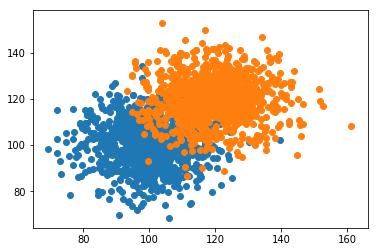

,y,x1,x2
0,1,99.825450,92.425490
1,2,118.607081,123.577469
2,2,120.064102,136.756083
3,2,122.794338,110.884804
4,2,98.313815,104.922676


finished fitting. w0:22072.0, w1:-90.80661782415805, w2:-117.79254389990096
training time:4.013916969299316s


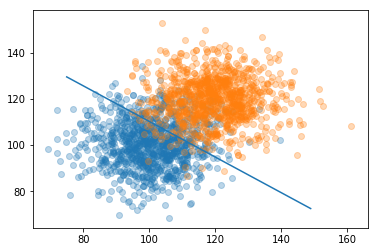

In [16]:
# data生成
data_num = 2 # 使うデータ数
s_x1 = np.zeros((1000,10))
s_x2 = np.zeros((1000,10))
s_x1[:,0], s_x2[:,0] = Sample(1).generate2d(1000, 100, 10)
s_x1[:,1], s_x2[:,1] = Sample(2).generate2d(1000, 120, 10)
s_x1[:,2], s_x2[:,2] = Sample(3).generate2d(1000, 140, 10)
s_x1[:,3], s_x2[:,3] = Sample(4).generate2d(1000, 100, 10, x1_shift = 40)
s_x1[:,4], s_x2[:,4] = Sample(5).generate2d(1000, 100, 10, x2_shift = 40)
s_x1[:,5], s_x2[:,5] = Sample(6).generate2d(1000, 180, 10)
s_x1[:,6], s_x2[:,6] = Sample(7).generate2d(1000, 140, 10, x1_shift = 40)
s_x1[:,7], s_x2[:,7] = Sample(8).generate2d(1000, 140, 10, x2_shift = 40)
s_x1[:,8], s_x2[:,8] = Sample(9).generate2d(1000, 100, 10, x1_shift = 80)
s_x1[:,9], s_x2[:,9] = Sample(10).generate2d(1000, 100, 10, x2_shift = 80)

for i in range(data_num):
    plt.scatter(s_x1[:,i], s_x2[:,i])

plt.show()
plt.close()

for i in range(data_num):
    exec("df{} = pd.DataFrame({{\'y\': {}, \'x1\': s_x1[:,i], \'x2\': s_x2[:,i]}})".format(i+1, i+1))

# shuffle
df = df1
for i in range(data_num-1):
    exec("df = pd.concat([df, df{}]).sample(frac=1).reset_index(drop=True)".format(i+2))
display(df.head())

# すでにshuffleされているためshuffleはfalse
# これらの値はDataFrame
x_train, x_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df[['y']], test_size=0.2, shuffle = False)

clsf = Classifier()
start = time.time()
clsf.fit(x_train, y_train)
print('training time:{}s'.format(time.time()-start))

for i in range(data_num):
    plt.scatter(s_x1[:,i], s_x2[:,i], alpha=0.3)


#分離境界線
x_fig = np.array(range(75,150))
y_fig = -(clsf.coef_[0]/clsf.coef_[1])*x_fig - (clsf.intercept_/clsf.coef_[1])

plt.plot(x_fig,y_fig)
plt.show()

# 分類

In [17]:
start = time.time()
clsf.predict(x_test, y_test)
print('test time:{}s'.format(time.time()-start))



class1:162/207(78.26086956521739%)
class2:190/193(98.44559585492227%)
test time:0.0020012855529785156s
